In [1]:
import pandas as pd
import matplotlib.pyplot as mp
import os

def get_newest_csv_file(dir_path):
    csv_files = []
    for file in os.listdir(dir_path):
        if file.endswith(".csv"):
            csv_files.append(file)
    if not csv_files:
        return None
    newest_csv_file = max(csv_files, key=os.path.getctime)
    return os.path.join(dir_path, newest_csv_file)

In [2]:
csv_file = get_newest_csv_file('/Users/heiko/Development/drasyl/')
print(csv_file)

/Users/heiko/Development/drasyl/WormholeSendChildChannelInitializer-43647.csv


In [3]:
df = pd.read_csv(csv_file)

# RFC 9293: Send Sequence Variables
df['Rel.SND.UNA'] = df['SND.UNA'] - df['ISS']
df['Rel.SND.NXT'] = df['SND.NXT'] - df['ISS']
df['Rel.SND.WL1'] = df['SND.WL1'] - df['IRS']
df['Rel.SND.WL2'] = df['SND.WL2'] - df['IRS']

# RFC 9293: Receive Sequence Variables
df['Rel.RCV.NXT'] = df['RCV.NXT'] - df['IRS']

df

,pid,time,SND.UNA,SND.NXT,SND.WND,SND.WL1,SND.WL2,ISS,SND.BUF,RCV.NXT,...,RTTVAR,SRTT,RTO,cwnd,ssthresh,Rel.SND.UNA,Rel.SND.NXT,Rel.SND.WL1,Rel.SND.WL2,Rel.RCV.NXT
0,43647,"Mon, 20 Mar 2023 05:15:49 +0100",0,0,0,0,0,0,0,0,...,0.000000,0.0,1000,3789,91648,0,0,0,0,0
1,43647,"Mon, 20 Mar 2023 05:15:49 +0100",0,0,0,0,0,0,0,0,...,0.000000,0.0,1000,3789,91648,0,0,0,0,0
2,43647,"Mon, 20 Mar 2023 05:15:49 +0100",0,0,0,0,0,0,0,0,...,0.000000,0.0,1000,3789,91648,0,0,0,0,0
3,43647,"Mon, 20 Mar 2023 05:15:49 +0100",0,0,0,0,0,0,0,0,...,0.000000,0.0,1000,3789,91648,0,0,0,0,0
4,43647,"Mon, 20 Mar 2023 05:15:49 +0100",0,0,0,0,0,0,0,0,...,0.000000,0.0,1000,3789,91648,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,43647,"Mon, 20 Mar 2023 05:16:30 +0100",2167738863,2167738863,90456,2190620952,2167738863,2122000604,0,2190620952,...,2.459869,21.0,1000,364775,91648,45738259,45738259,44,-22882045,44
412,43647,"Mon, 20 Mar 2023 05:16:30 +0100",2167738863,2167738863,90456,2190620952,2167738863,2122000604,0,2190620952,...,2.459869,21.0,1000,364775,91648,45738259,45738259,44,-22882045,44
413,43647,"Mon, 20 Mar 2023 05:16:30 +0100",2167738863,2167738863,90456,2190620952,2167738863,2122000604,0,2190620952,...,2.459869,21.0,1000,364775,91648,45738259,45738259,44,-22882045,44
414,43647,"Mon, 20 Mar 2023 05:16:30 +0100",2167738863,2167738863,90456,2190620952,2167738863,2122000604,0,2190620952,...,2.459869,21.0,1000,364775,91648,45738259,45738259,44,-22882045,44


# RFC 9293: Send Sequence Variables

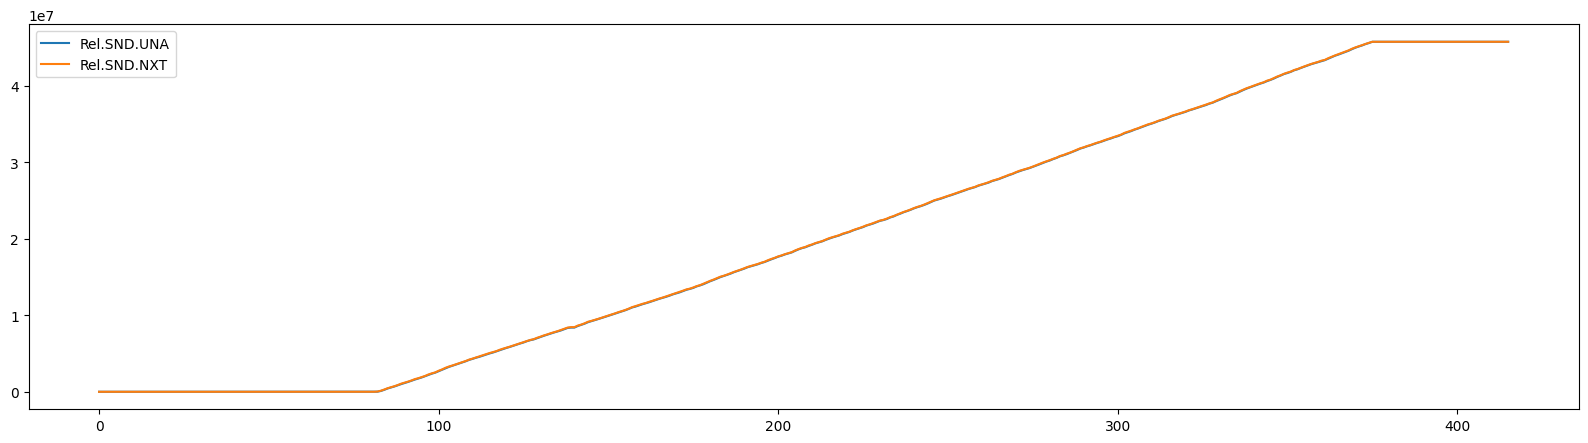

In [4]:
df.plot(y=['Rel.SND.UNA', 'Rel.SND.NXT'], figsize=(20, 5))
mp.show()

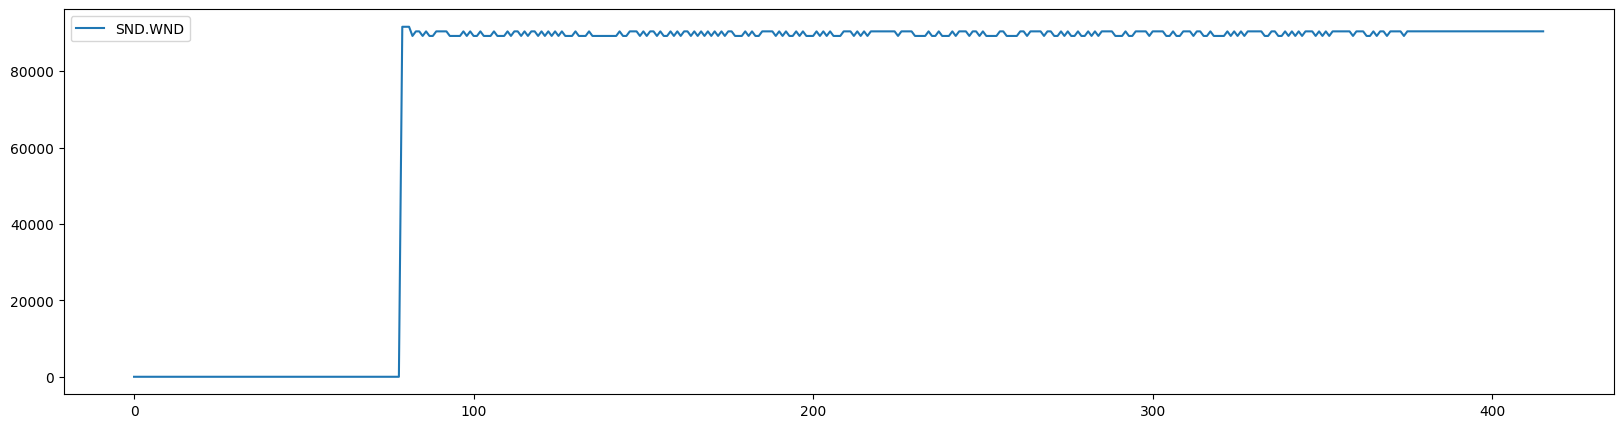

In [5]:
df.plot(y=['SND.WND'], figsize=(20, 5))
mp.show()

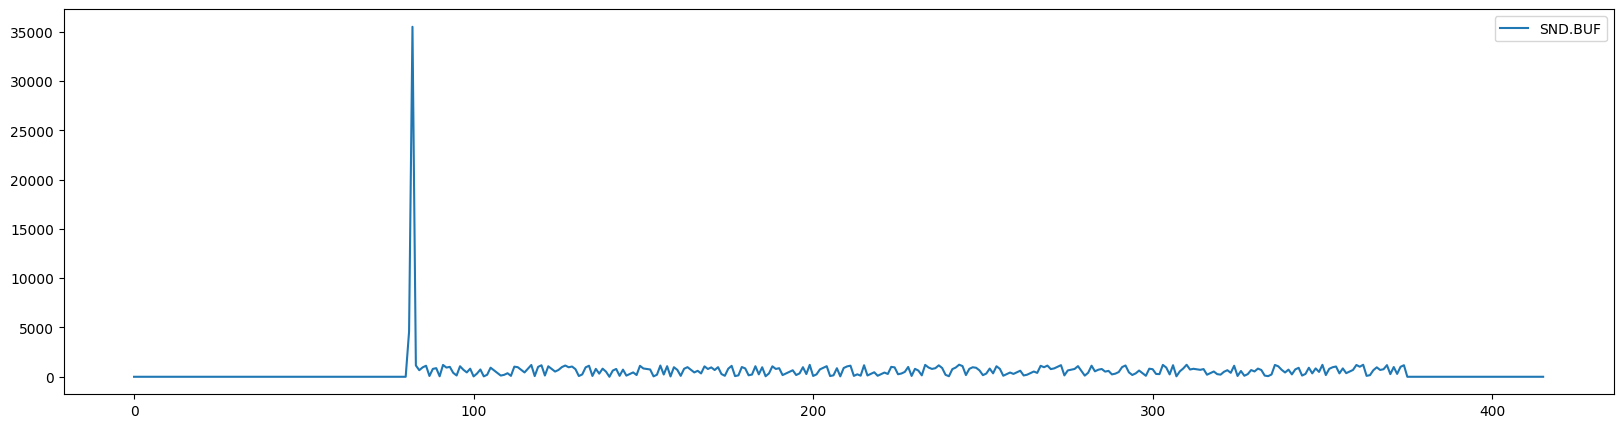

In [13]:
df.plot(y=['SND.BUF'], figsize=(20, 5))
mp.show()

# RFC 9293: Receive Sequence Variables

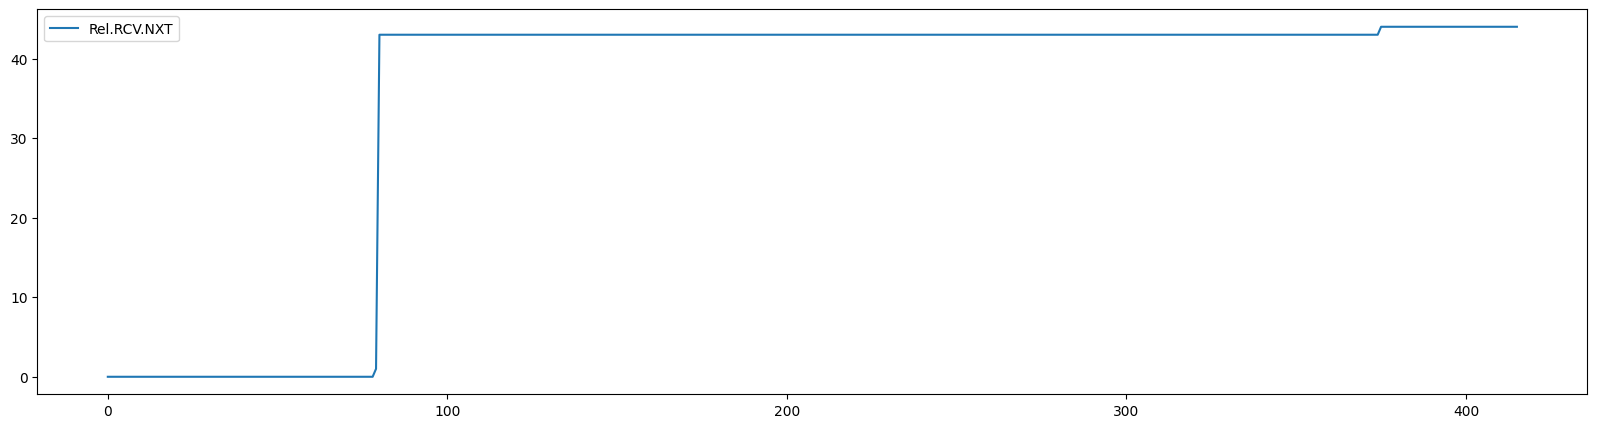

In [6]:
df.plot(y=['Rel.RCV.NXT'], figsize=(20, 5))
mp.show()

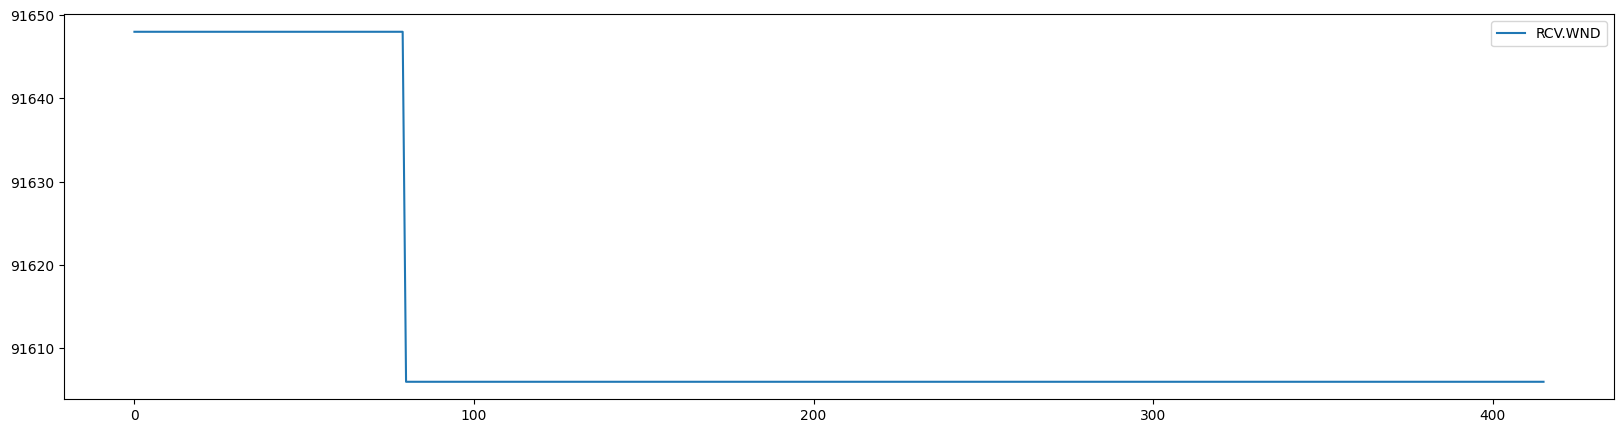

In [7]:
df.plot(y=['RCV.WND'], figsize=(20, 5))
mp.show()

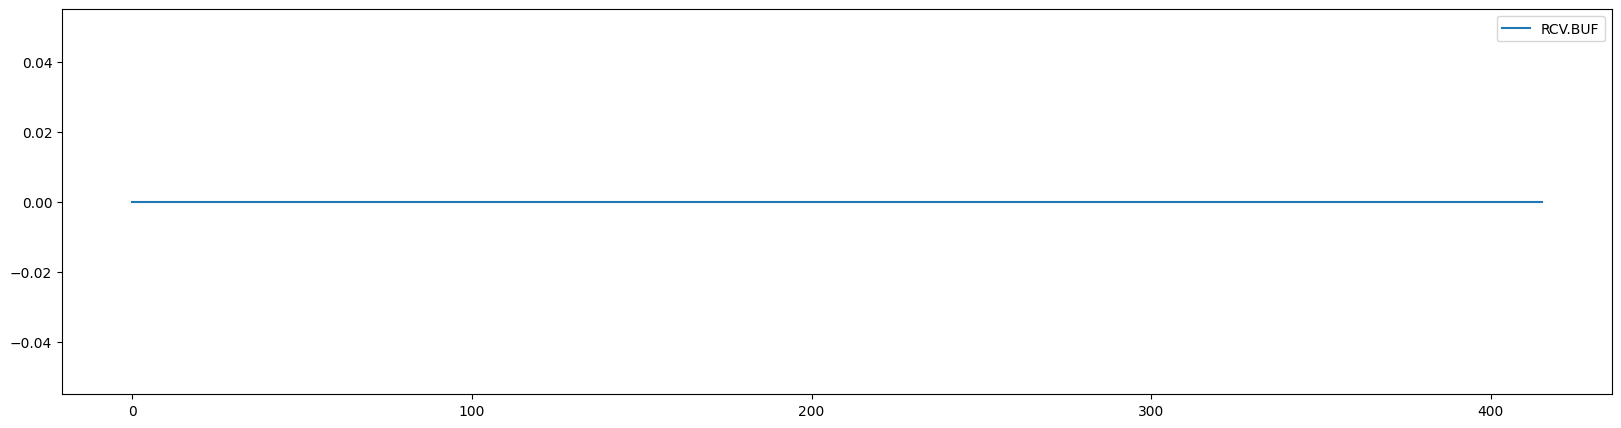

In [14]:
df.plot(y=['RCV.BUF'], figsize=(20, 5))
mp.show()

# RFC 6298: Retransmission Timer Computation

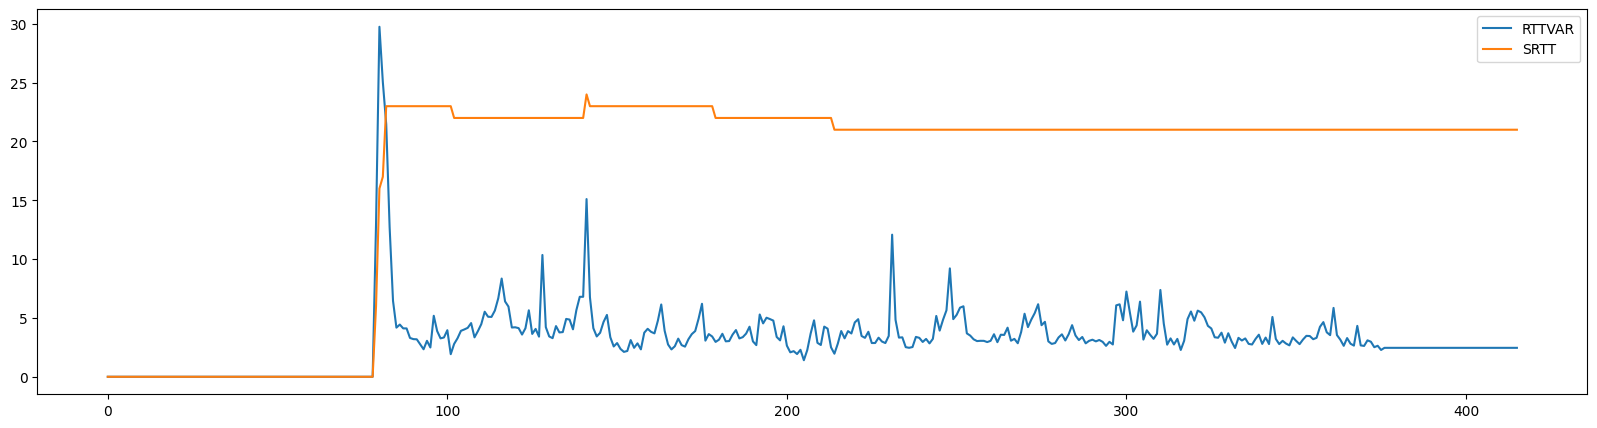

In [8]:
df.plot(y=['RTTVAR', 'SRTT'], figsize=(20, 5))
mp.show()

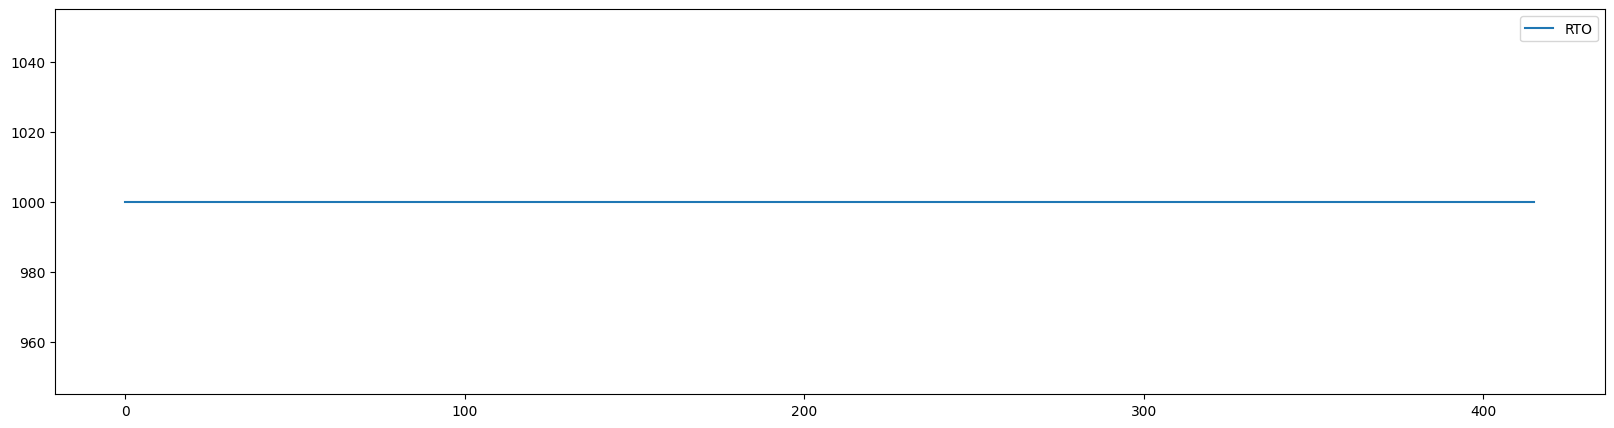

In [9]:
df.plot(y=['RTO'], figsize=(20, 5))
mp.show()

# RFC 5681: Congestion Control Algorithms

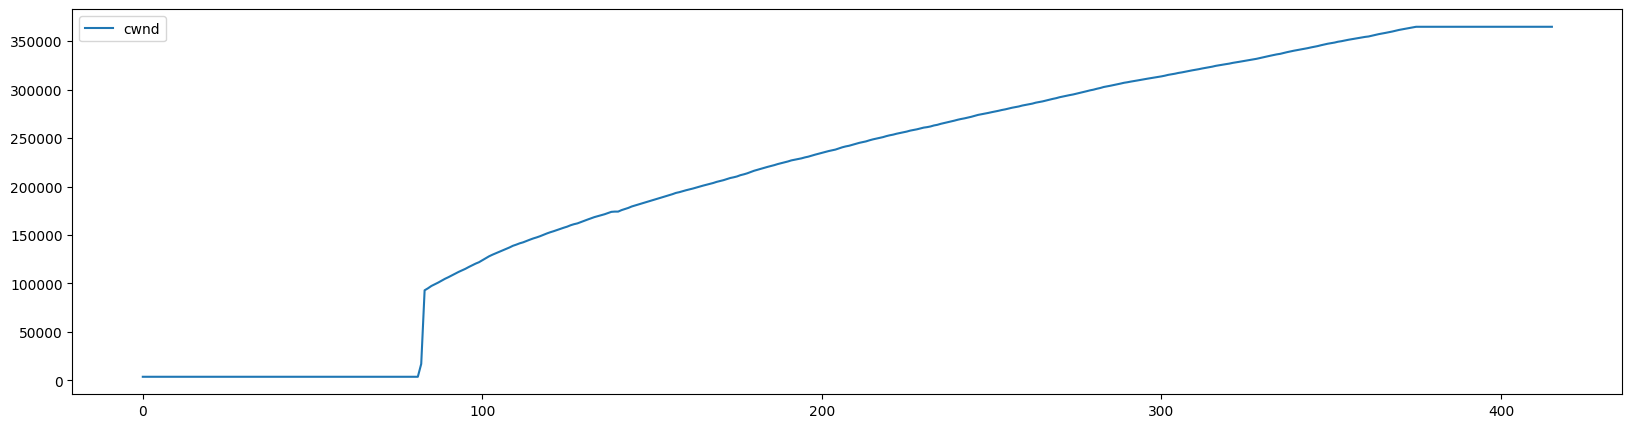

In [10]:
df.plot(y=['cwnd'], figsize=(20, 5))
mp.show()

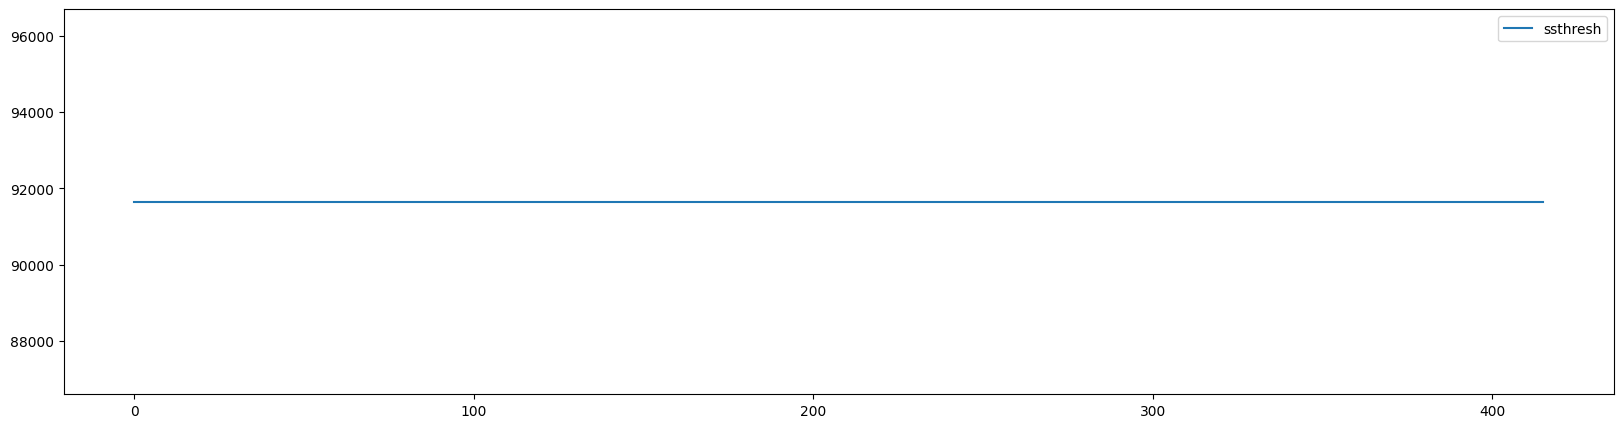

In [11]:
df.plot(y=['ssthresh'], figsize=(20, 5))
mp.show()

# Misc

<Axes: >

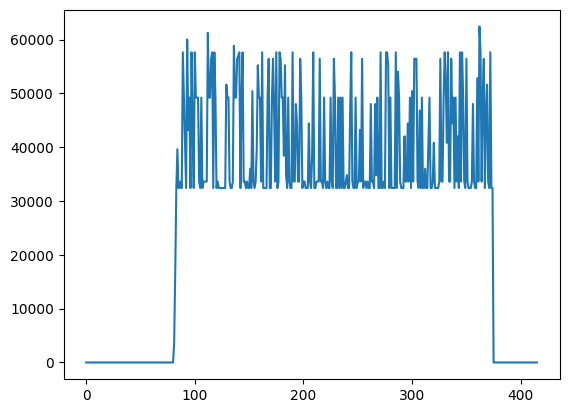

In [12]:
df['Unacknowledged Data'] = df['SND.NXT'] - df['SND.UNA']
df['Unacknowledged Data'].plot()